### note của bản thân
baseline sẽ là code của người ta nhưng chưa clean text, code mình là đã clean text

baseline là code của người ta nhưng sử dụng trường description. Còn của mình là sử dụng trường theme

In [511]:
import pandas as pd



In [512]:
df = pd.read_csv('./ML_data.csv')

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   4185 non-null   int64 
 1   Synonyms     2899 non-null   object
 2   Genre        4106 non-null   object
 3   English      3121 non-null   object
 4   Aired        4185 non-null   object
 5   Licensors    4183 non-null   object
 6   Studios      4185 non-null   object
 7   Theme        3266 non-null   object
 8   Ranked       4185 non-null   object
 9   Demographic  4185 non-null   object
 10  Source       4185 non-null   object
 11  Broadcast    2068 non-null   object
 12  Members      4185 non-null   object
 13  Favorites    4185 non-null   object
 14  Episodes     4185 non-null   object
 15  Type         4185 non-null   object
 16  Producers    4185 non-null   object
 17  Popularity   4185 non-null   object
 18  Duration     4185 non-null   object
 19  Rating       4179 non-null 

In [514]:
#1 drop licensors, unnamed, 
#! làm regression với ranked, source 
#! làm classification với Demographic, 

# df.head(3)
df['Source'].head(3)

0           Manga
1           Manga
2    Visual novel
Name: Source, dtype: object

In [515]:
df.head(3)

,Unnamed: 0,Synonyms,Genre,English,Aired,Licensors,Studios,Theme,Ranked,Demographic,...,Members,Favorites,Episodes,Type,Producers,Popularity,Duration,Rating,Premiered,Status
0,0,Frieren at the Funeral,"AdventureAdventure, DramaDrama, ...",Frieren: Beyond Journey's End,"Sep 29, 2023 to Mar 22, 2024",葬送のフリーレン,Madhouse,NaN,#122 based on the top anime page. Please no...,ShounenShounen,...,"725,256","40,537",28,TV,"Aniplex, Dentsu, Shogakukan-Shueis...",#277,24 min. per ep.,PG-13 - Teens 13 or older,Fall 2023,Finished Airing
1,1,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...","ActionAction, AdventureAdventure, ...",Fullmetal Alchemist: Brotherhood,"Apr 5, 2009 to Jul 4, 2010",鋼の錬金術師 FULLMETAL ALCHEMIST,Bones,MilitaryMilitary,#222 based on the top anime page. Please no...,ShounenShounen,...,"3,346,066","226,011",64,TV,"Aniplex, Square Enix, Mainichi Bro...",#3,24 min. per ep.,R - 17+ (violence & profanity),Spring 2009,Finished Airing
2,2,NaN,"DramaDrama, Sci-FiSci-Fi, Susp...",Steins;Gate,"Apr 6, 2011 to Sep 14, 2011",STEINS;GATE,White Fox,"PsychologicalPsychological, Time Trave...",#322 based on the top anime page. Please no...,All,...,"2,564,359","189,650",24,TV,"Frontier Works, Media Factory, Kad...",#13,24 min. per ep.,PG-13 - Teens 13 or older,Spring 2011,Finished Airing


In [516]:
#! append description column to df
df_description = pd.read_csv('../CrawlData/review_movie.csv')
len(df_description)

# df['Description'] = df_description['description']
# df['Synonyms'] = df['Synonyms'].fillna('no name')
# df['Genre']=df['Genre'].fillna('no genre')
# df['Description']=df['Description'].fillna('no description')

#! drop all nan row:
df['Description'] = df_description['description']


In [517]:
sum(df['Genre'].isna())

79

In [518]:
df['Genre'] = df['Genre'].str.split(',', expand=True)[0]
df['Genre']

0       AdventureAdventure
1             ActionAction
2               DramaDrama
3             ActionAction
4             ActionAction
               ...        
4180          ComedyComedy
4181            DramaDrama
4182          ActionAction
4183          ActionAction
4184        FantasyFantasy
Name: Genre, Length: 4185, dtype: object

In [519]:
# df.to_csv('./ML_data_test2.csv')

In [520]:
# df = pd.read_csv('./ML_data_test2.csv')
# df.info()

In [521]:
# df[df['Genre'].isnull()]

In [522]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression

In [523]:
data = pd.DataFrame({'Synonyms': df['Synonyms'], 'Genre': df['Genre'], 'Theme': df['Theme']})
data.to_csv('./train_data_classify_movie.csv')

In [524]:
path = "./train_data_classify_movie.csv"
data = pd.read_csv(path)

In [525]:
data = data.dropna()

In [526]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2211 entries, 1 to 4183
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2211 non-null   int64 
 1   Synonyms    2211 non-null   object
 2   Genre       2211 non-null   object
 3   Theme       2211 non-null   object
dtypes: int64(1), object(3)
memory usage: 86.4+ KB


In [527]:
print(data.describe())

        Unnamed: 0
count  2211.000000
mean   2012.220262
std    1210.354103
min       1.000000
25%     980.500000
50%    1953.000000
75%    3057.500000
max    4183.000000


In [528]:
data.head(3)

,Unnamed: 0,Synonyms,Genre,Theme
1,1,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",ActionAction,MilitaryMilitary
3,3,Gintama' (2015),ActionAction,"Gag HumorGag Humor, HistoricalHistoric..."
7,7,Gintama (2011),ActionAction,"Gag HumorGag Humor, HistoricalHistoric..."


In [529]:
#! trong 2000 data thi 1/2 train, 1/2 test
#! baseline sẽ là chia không random như dưới
# train_data = data[:1000]
# test_data = data[1000:2001]
#! để hơn baseline, cải thiện data bằng cách random
data = data.sample(frac=1)
train_data = data[:1000]
test_data = data[1000:2001]

In [530]:
train_data.head(3)

,Unnamed: 0,Synonyms,Genre,Theme
3128,3128,PreCure All Stars - Singing with Everyone♪ Mir...,ActionAction,"Mahou ShoujoMahou Shoujo, MusicMusic"
1343,1343,Tennis no Ouji-sama OVA Another Story: Kako to...,SportsSports,SchoolSchool
3573,3573,"Lord Xue Ying, Snow Eagle Lord",ActionAction,"HistoricalHistorical, Martial ArtsMart..."


In [531]:
test_data.head(3)

,Unnamed: 0,Synonyms,Genre,Theme
639,639,Full Moon o Sagashite,ComedyComedy,"MusicMusic, ShowbizShowbiz"
614,614,"Oofuri, Big Windup! 2, Swing Big! 2, Ookiku Fu...",SportsSports,Team SportsTeam Sports
1604,1604,The iDOLM@STER Series Concept Movie 2021,Sci-FiSci-Fi,"Idols (Female)Idols (Female), Idols (M..."


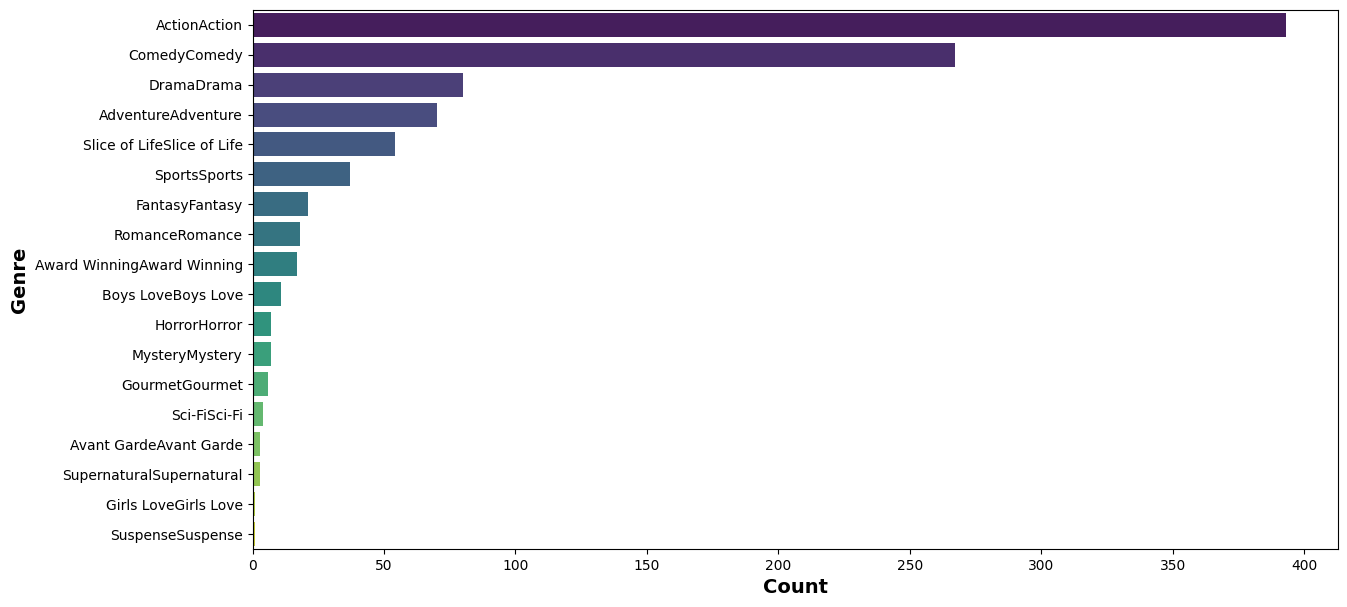

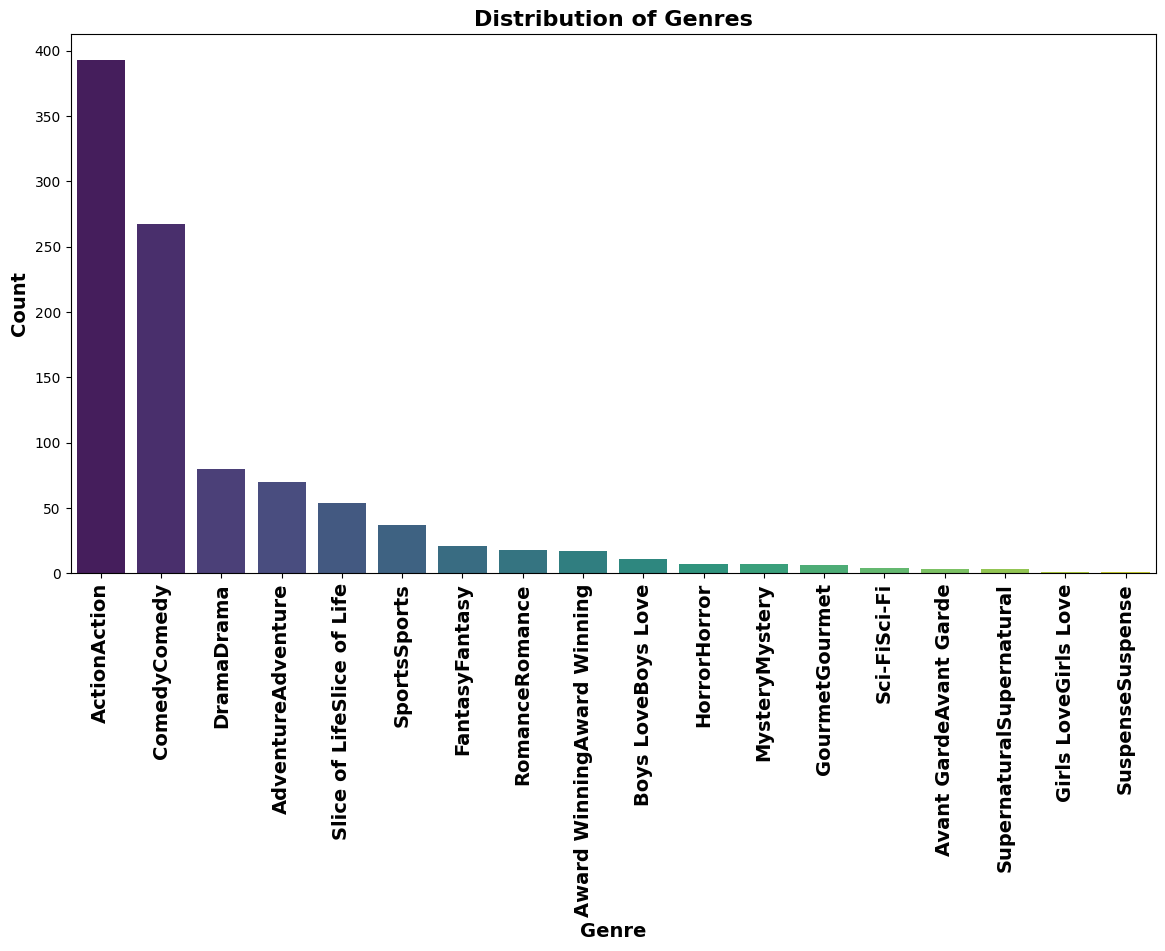

In [532]:
#! vì có quá nhiều từ nên phải vẽ word cloud để xem gerne nào nhiều nhất
# Plot the distribution of genres in the training data
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = train_data['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [533]:
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
train_data['Text_cleaning'] = train_data['Theme'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Theme'].apply(clean_text)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23612\2256855920.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Text_cleaning'] = train_data['Theme'].apply(clean_text)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23612\2256855920.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Text_cleaning'] = test_data['Theme'].apply(clean_text)


In [534]:
test_data.head(3)

,Unnamed: 0,Synonyms,Genre,Theme,Text_cleaning
639,639,Full Moon o Sagashite,ComedyComedy,"MusicMusic, ShowbizShowbiz",musicmusic showbizshowbiz
614,614,"Oofuri, Big Windup! 2, Swing Big! 2, Ookiku Fu...",SportsSports,Team SportsTeam Sports,team sportsteam sports
1604,1604,The iDOLM@STER Series Concept Movie 2021,Sci-FiSci-Fi,"Idols (Female)Idols (Female), Idols (M...",idols female idols female idols male idols mal...


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23612\254112512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)


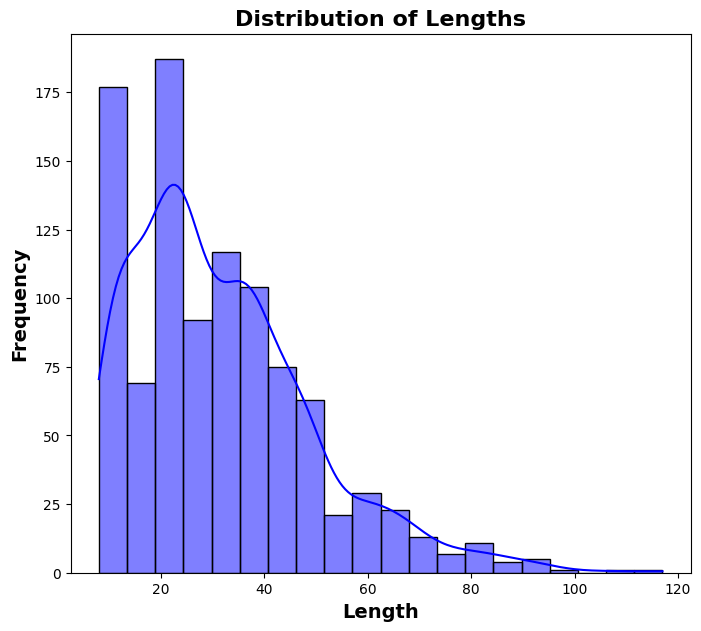

In [535]:
# Calculate the length of cleaned text
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)
# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=train_data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

In [536]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

In [537]:
# Split the data into training and validation sets
X = X_train
y = train_data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.59
                            precision    recall  f1-score   support

              ActionAction       0.67      0.85      0.75        89
        AdventureAdventure       0.00      0.00      0.00        11
    Avant GardeAvant Garde       0.00      0.00      0.00         1
Award WinningAward Winning       0.00      0.00      0.00         5
        Boys LoveBoys Love       0.00      0.00      0.00         1
              ComedyComedy       0.49      0.67      0.57        51
                DramaDrama       0.25      0.07      0.11        15
            FantasyFantasy       0.00      0.00      0.00         2
            GourmetGourmet       0.00      0.00      0.00         3
              HorrorHorror       0.00      0.00      0.00         2
            MysteryMystery       0.00      0.00      0.00         1
            RomanceRomance       0.00      0.00      0.00         4
              Sci-FiSci-Fi       0.00      0.00      0.00         1
Slice of LifeSlice of

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [538]:
# Use the trained model to make predictions on the test data
X_test_predictions = classifier.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23612\2380086762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Genre'] = X_test_predictions


In [539]:
# Save the test_data DataFrame with predicted genres to a CSV file
test_data.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres


In [540]:
test_data.head(100)

,Unnamed: 0,Synonyms,Genre,Theme,Text_cleaning,Predicted_Genre
639,639,Full Moon o Sagashite,ComedyComedy,"MusicMusic, ShowbizShowbiz",musicmusic showbizshowbiz,ComedyComedy
614,614,"Oofuri, Big Windup! 2, Swing Big! 2, Ookiku Fu...",SportsSports,Team SportsTeam Sports,team sportsteam sports,SportsSports
1604,1604,The iDOLM@STER Series Concept Movie 2021,Sci-FiSci-Fi,"Idols (Female)Idols (Female), Idols (M...",idols female idols female idols male idols mal...,ComedyComedy
453,453,DMC,ComedyComedy,"Adult CastAdult Cast, Gag HumorGag Hum...",adult castadult cast gag humorgag humor musicm...,ComedyComedy
3616,3616,Code Geass: Lelouch of the Rebellion Episode 8...,ActionAction,"MechaMecha, MilitaryMilitary, ...",mechamecha militarymilitary schoolschool super...,ActionAction
...,...,...,...,...,...,...
2789,2789,"Saiunkoku Monogatari Soushuuhen, Saiunkoku Pic...",AdventureAdventure,"HistoricalHistorical, Reverse HaremRev...",historicalhistorical reverse haremreverse harem,ComedyComedy
3636,3636,"仙武帝尊, King of Martial Arts, Xianwu Dizun, Xian...",ActionAction,"HistoricalHistorical, Martial ArtsMart...",historicalhistorical martial artsmartial arts,ActionAction
1555,1555,"I became the sword by transmigrating, TenKen",ActionAction,"IsekaiIsekai, ReincarnationReincarnation",isekaiisekai reincarnationreincarnation,ActionAction
1955,1955,"To LOVE-Ru Trouble Darkness, To-Love-Ru Darkne...",ComedyComedy,"HaremHarem, SchoolSchool",haremharem schoolschool,ComedyComedy


In [541]:
df[df['Synonyms'] == 'The iDOLM@STER Series Concept Movie 2021']

,Unnamed: 0,Synonyms,Genre,English,Aired,Licensors,Studios,Theme,Ranked,Demographic,...,Favorites,Episodes,Type,Producers,Popularity,Duration,Rating,Premiered,Status,Description
1604,1604,The iDOLM@STER Series Concept Movie 2021,Sci-FiSci-Fi,NaN,"Aug 25, 2021",VOY@GER,CloverWorks,"Idols (Female)Idols (Female), Idols (M...",#184922 based on the top anime page. Please...,All,...,13,1,ONA,"Khara, Half H.P Studio, Nippon Col...",#9108,8 min.,G - All Ages,NaN,Finished Airing,"A special episode aired after ep. 490, it summ..."
